## Imports: 

In [1]:
import pickle
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

## loading database:

In [2]:
with open('pre_processed_census_database.pkl', mode='rb') as f:
    X_training, y_training, X_test, y_test, X_scaler = pickle.load(f)

In [3]:
X_training.shape, y_training.shape, X_test.shape, y_test.shape

((25637, 108), (25637,), (4525, 108), (4525,))

In [4]:
X_training

array([[-0.24923292,  5.7990656 , -0.2618232 , ..., -0.14945152,
        -0.21178197,  1.56608846],
       [-0.24923292, -0.17244157, -0.2618232 , ..., -0.14945152,
        -0.21178197, -0.02660563],
       [-0.24923292, -0.17244157,  3.81937127, ..., -0.14945152,
        -0.21178197, -0.42477915],
       ...,
       [-0.24923292, -0.17244157, -0.2618232 , ..., -0.14945152,
        -0.21178197, -0.02660563],
       [-0.24923292, -0.17244157, -0.2618232 , ..., -0.14945152,
        -0.21178197, -0.02660563],
       [-0.24923292, -0.17244157, -0.2618232 , ..., -0.14945152,
        -0.21178197, -0.82295267]])

In [5]:
y_training

array([0., 0., 0., ..., 0., 0., 0.])

## Training

### Model

In [6]:
model = keras.Sequential([
    keras.layers.Dense(108, activation=tensorflow.nn.relu),
    keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(2, activation=tensorflow.nn.softmax)
])


### Hyperparameters

In [7]:
adam = keras.optimizers.Adam(learning_rate=0.0001)

callbacks = [
    keras.callbacks.EarlyStopping('val_loss'), 
    keras.callbacks.EarlyStopping('val_accuracy')
]

### Compile

In [8]:
model.compile(optimizer=adam, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_training, y_training, 
                    batch_size=16,
                    epochs=30, 
                    validation_split=0.2, 
                    callbacks=callbacks)

Epoch 1/30
1282/1282 [==============================] - 4s 2ms/step - loss: 0.4720 - accuracy: 0.7763 - val_loss: 0.3720 - val_accuracy: 0.8231
Epoch 2/30
1282/1282 [==============================] - 2s 2ms/step - loss: 0.3725 - accuracy: 0.8263 - val_loss: 0.3520 - val_accuracy: 0.8335
Epoch 3/30
1282/1282 [==============================] - 2s 2ms/step - loss: 0.3539 - accuracy: 0.8368 - val_loss: 0.3464 - val_accuracy: 0.8364
Epoch 4/30
1282/1282 [==============================] - 2s 2ms/step - loss: 0.3412 - accuracy: 0.8399 - val_loss: 0.3385 - val_accuracy: 0.8426
Epoch 5/30
1282/1282 [==============================] - 2s 2ms/step - loss: 0.3339 - accuracy: 0.8443 - val_loss: 0.3365 - val_accuracy: 0.8424


## Visualizing training and validation:

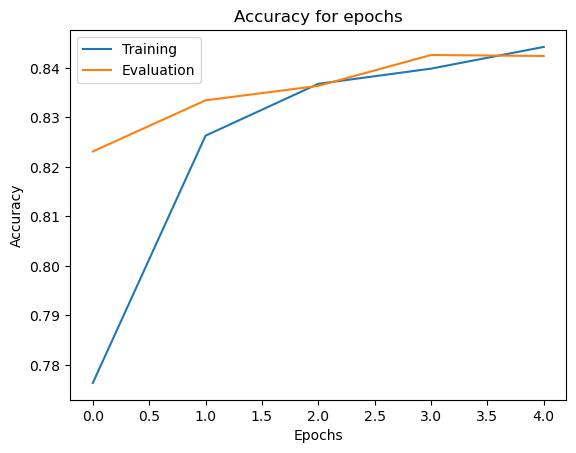

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy for epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Evaluation'])
plt.show()

## Visualizing losses and validation:

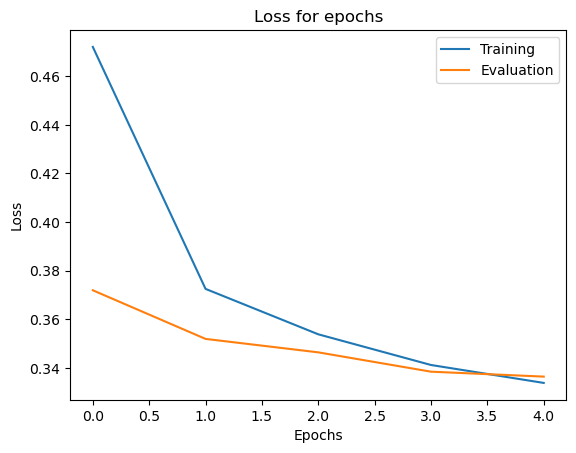

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss for epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Evaluation'])
plt.show()

## Evaluating the model with the test base:
### Accuracy and Loss

In [11]:
loss_test, accuracy_test = model.evaluate(X_test, y_test)
print(f'\nLOSS: >>>>> {loss_test}')
print(f'\nACCURACY: >>>>> {accuracy_test}')

142/142 [==============================] - 0s 1ms/step - loss: 0.3276 - accuracy: 0.8510

LOSS: >>>>> 0.32761579751968384

ACCURACY: >>>>> 0.8510497212409973


## Testing with test dataset 

In [12]:
test_data = model.predict(X_test)
prediction = np.argmax(test_data[0])
pred_true = y_test[0]

142/142 [==============================] - 0s 1ms/step


In [13]:
if prediction == 0:
    print('Pediction: >>> Annual income less than or equal to 50 >>>(<=50k)')
else:
    print('Pediction: >>> Annual income greater than 50k >>>(>50k)')
if pred_true == 0:
    print('Pred_True: >>> Annual income less than or equal to 50 >>>(<=50k)')
else:
    print('Pred_True: >>> Annual income greater than 50k >>>(>50k)')
    

Pediction: >>> Annual income less than or equal to 50 >>>(<=50k)
Pred_True: >>> Annual income less than or equal to 50 >>>(<=50k)


## Saving model:

In [14]:
model.save('model.keras')